# Horizon tiling of the sky

Computation of the angular size of the horizon at a given redshift z, projected on the sky.

In [64]:
import numpy as np
import matplotlib.pyplot as plt

import camb

In [65]:
# Set up the parameters for CAMB

# Set up the parameters for the fiducial cosmology
#pars = camb.set_params(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06,  
#                       As=2e-9, ns=0.965, halofit_version='mead', lmax=3000)
pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06)

class: <CAMBparams>
 WantCls = True
 WantTransfer = False
 WantScalars = True
 WantTensors = False
 WantVectors = False
 WantDerivedParameters = True
 Want_cl_2D_array = True
 Want_CMB = True
 Want_CMB_lensing = True
 DoLensing = True
 NonLinear = NonLinear_none
 Transfer: <TransferParams>
   high_precision = False
   accurate_massive_neutrinos = False
   kmax = 0.9
   k_per_logint = 0
   PK_num_redshifts = 1
   PK_redshifts = [0.0]
 want_zstar = False
 want_zdrag = False
 min_l = 2
 max_l = 2500
 max_l_tensor = 600
 max_eta_k = 5000.0
 max_eta_k_tensor = 1200.0
 ombh2 = 0.022
 omch2 = 0.122
 omk = 0.0
 omnuh2 = 0.000644866570625114
 H0 = 67.5
 TCMB = 2.7255
 YHe = 0.24569492503497048
 num_nu_massless = 2.0293333333333337
 num_nu_massive = 1
 nu_mass_eigenstates = 1
 share_delta_neff = False
 nu_mass_degeneracies = [1.0146666666666666]
 nu_mass_fractions = [1.0]
 nu_mass_numbers = [1]
 InitPower: <InitialPowerLaw>
   tensor_parameterization = tensor_param_rpivot
   ns = 0.96
   nrun = 

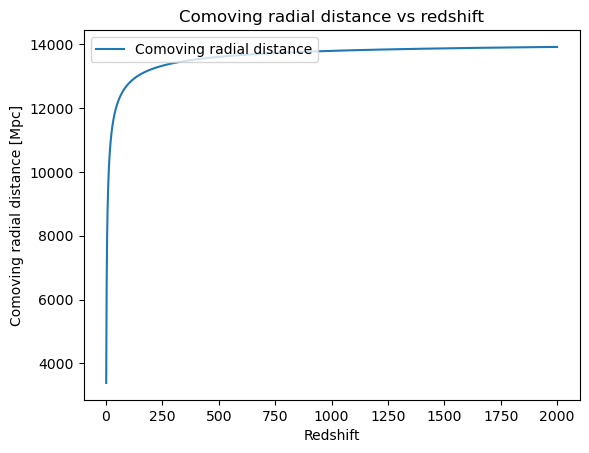

In [66]:
# Computing comuving distance for the fiducial cosmology

#results1 = camb.get_results(pars) # Get the results for the fiducial cosmology
results = camb.get_background(pars) # Get the background results

n_points = 2000
z = np.linspace(1, 2000, n_points) # Redshift 

chi = results.comoving_radial_distance(z) # Comoving radial distance

plt.plot(z, chi, label='Comoving radial distance')
plt.legend(loc='upper left')
plt.xlabel('Redshift')
plt.ylabel('Comoving radial distance [Mpc]')
plt.title('Comoving radial distance vs redshift')
#plt.xlim(0, 2)

plt.show()



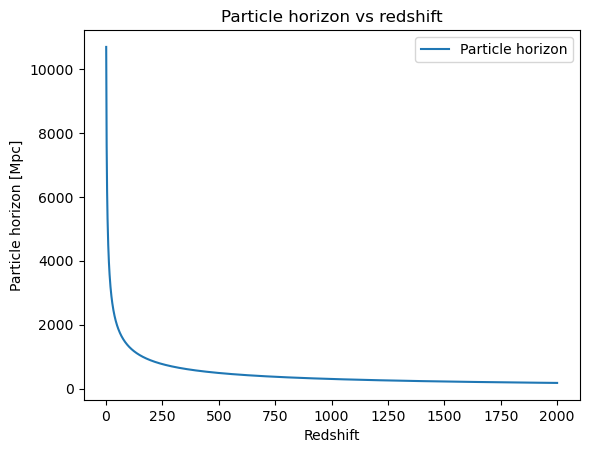

In [67]:
# Computing the particle horizon for the fiducial cosmology at different redshifts

# Array of infinite redshifts
z_inf = np.full(n_points, np.inf)

# Computing the particle horizon from infinity to redshift z
ph = results.comoving_radial_distance(z_inf) - results.comoving_radial_distance(z)

# Reshaffling the array to have the particle horizon at redshift z in the same order as z
#ph = ph[::-1]

plt.plot(z, ph, label='Particle horizon')
plt.legend(loc='best')
plt.xlabel('Redshift')
plt.ylabel('Particle horizon [Mpc]')
plt.title('Particle horizon vs redshift')
#plt.xlim(0, 2)
plt.show()

In [68]:
ph[1100], chi[1100]

(277.57581959193885, 13806.746021544166)

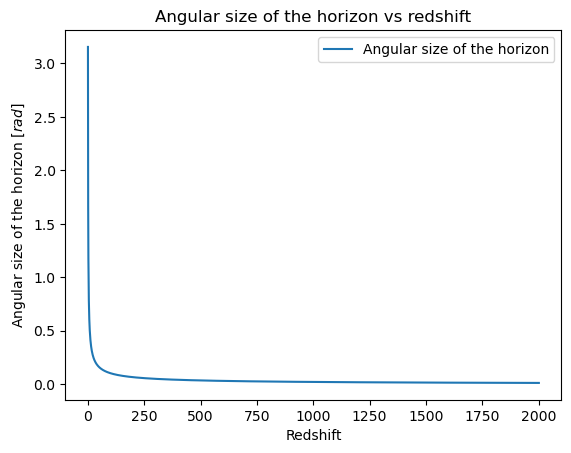

In [69]:
# Computing the angular size of the horizon at different redshifts
theta = ph / chi # Angular size of the horizon in radians 
 

plt.plot(z, theta, label='Angular size of the horizon')
plt.legend(loc='best')
plt.xlabel('Redshift')
plt.ylabel('Angular size of the horizon [$rad$]')
plt.title('Angular size of the horizon vs redshift')
#plt.xlim(1075, 1125)
#plt.ylim(0, 0.05)
plt.show()

In [70]:
# Theta at z = 1100
theta_1100 = theta[1100]
print('Angular size of the horizon at z = 1100: ', theta_1100)
print('Angular size of the horizon at z = 1100 in degrees: ', np.degrees(theta_1100))


Angular size of the horizon at z = 1100:  0.02010436196615822
Angular size of the horizon at z = 1100 in degrees:  1.1518950904641996


In [71]:
z[1099]

1100.0